# **Task 1: Predict Employee Attrition**

**Objective:** Build a classification model to predict whether an employee will leave a company
based on HR data and derive actionable retention strategies.

**●Dataset:** IBM HR Analytics Dataset

**● Steps:**
1. Perform Exploratory Data Analysis (EDA) to identify key factors influencing
attrition.
2. Train classification models such as Random Forest or Logistic Regression.
3. Use SHAP or LIME to explain model predictions and interpret results.
4. Provide actionable insights to reduce attrition.

**● Outcome:** A classification model for employee attrition with
explainable insights for HR retention strategies.

# **Import Libraries**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import shap
import lime.lime_tabular

# **Load Dataset**
IBM HR Analytics Datase

In [99]:
from google.colab import files

# Step 2: Upload dataset
print("Please upload the IBM HR Analytics CSV file...")
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))


Please upload the IBM HR Analytics CSV file...


Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1) (5).csv


# **1. EDA - Identify key factors influencing attrition**
Perform Exploratory Data Analysis (EDA) to identify key factors influencing attrition.

1.Attrition distribution

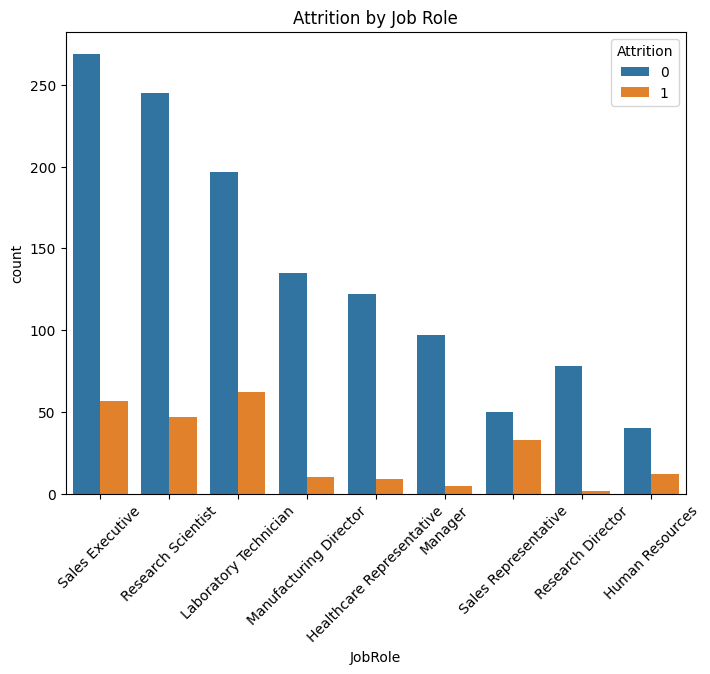

In [100]:
# Convert target variable to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Plot attrition by features
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()


2. plot correlation with Attrition

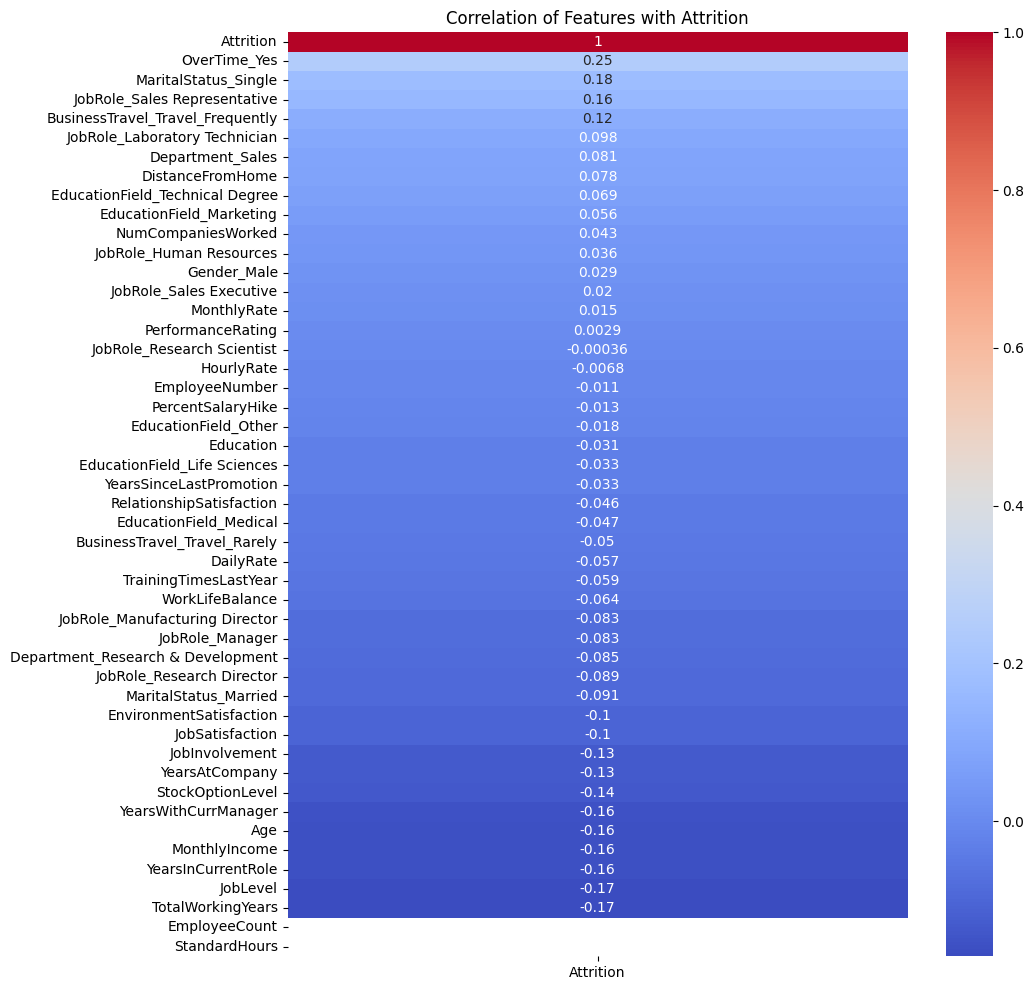

In [102]:
df = pd.read_csv(next(iter(uploaded)))

# Encode 'Attrition' to numeric
corr_df = df.copy()
corr_df['Attrition'] = corr_df['Attrition'].map({'Yes': 1, 'No': 0})

# Convert all categorical columns for correlation
corr_df_encoded = pd.get_dummies(corr_df, drop_first=True)

# Plot correlation with Attrition
plt.figure(figsize=(10, 12))
corr = corr_df_encoded.corr()
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Attrition")
plt.show()

# **2. Preprocessing for Modeling**

Train classification models such as Random Forest or Logistic Regression.

In [103]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Train Classification Models**
1. Random Forest

In [104]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



2. Logistic Regression

In [105]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       255
        True       0.50      0.18      0.26        39

    accuracy                           0.87       294
   macro avg       0.69      0.58      0.60       294
weighted avg       0.83      0.87      0.84       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **3. Explain Model with SHAP**
Use SHAP or LIME to explain model predictions and interpret results.

1. SHAP

<Figure size 640x480 with 0 Axes>

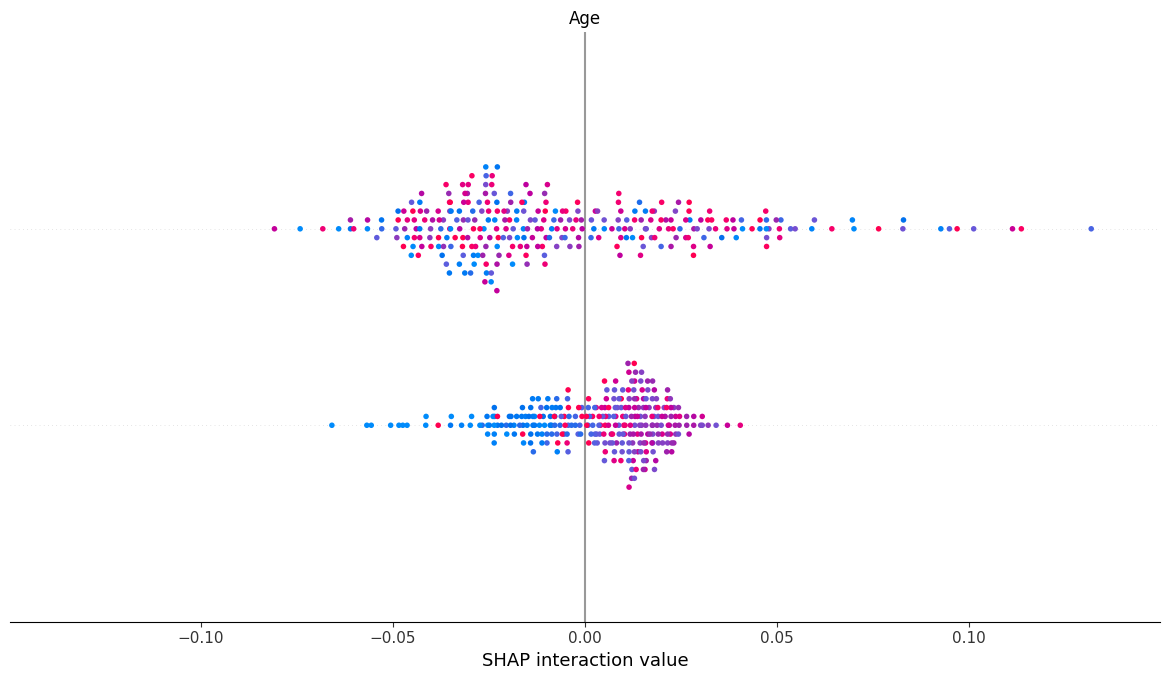

In [106]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


2. LIME

In [107]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['No Attrition', 'Attrition'],
    mode='classification'
)
i = 0  # explain the first test instance
lime_exp = lime_explainer.explain_instance(X_test.iloc[i].values, rf.predict_proba, num_features=10)
lime_exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **4. Actionable Insights**
Provide actionable insights to reduce attrition.

In [109]:
print("\nTop 5 Features Influencing Attrition (by Random Forest importance):\n")
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances.head(15))


Top 5 Features Influencing Attrition (by Random Forest importance):

MonthlyIncome           0.071784
OverTime_Yes            0.061896
DailyRate               0.054603
EmployeeNumber          0.049249
Age                     0.048570
TotalWorkingYears       0.047738
MonthlyRate             0.047392
HourlyRate              0.041425
DistanceFromHome        0.040048
YearsAtCompany          0.036038
YearsWithCurrManager    0.030904
NumCompaniesWorked      0.030406
PercentSalaryHike       0.029476
StockOptionLevel        0.027809
YearsInCurrentRole      0.027507
dtype: float64
